# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
# from urllib.request import urlopen
# import random
import re
# import scrapy
from PIL import Image
from io import BytesIO

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [2]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [3]:
#your code
response = requests.get(url)
content = BeautifulSoup(response.content, 'html.parser')
print(response.content)

b'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-1G4rYJktwRTQKn7fVfJUxH8RRZFUJlGo77xMZfBfIhZPx4BHVrzPE1VgnafttXI8G3y/PywH3uXyhNkSLp3+oA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-d46e2b60992dc114d02a7edf55f254c4.css" /><link crossorigin="anonymous" media="all" integrity="sha512-hI5b2oqTE9njfjYrfuzXqA4bSGSNrE5OMc9IiFhZy+RDGg9Qn4Si1A97o0MlinlwFt3xAifvoLX0s7j

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [4]:
#your code
developers = content.findAll('article' , attrs={'class':'Box-row d-flex'})

In [5]:
dev_collection=[]
try:
    for ele in developers:
        name=ele.find('h1', attrs={'class':'h3 lh-condensed'}).find('a').text
        subname=ele.find('p', attrs={'class':'f4 text-normal mb-1'}).find('a').text
        s = f'{name}({subname})'
        dev_collection.append(s)
except:
    pass

In [6]:
i=0
for elem in dev_collection:
    elem = elem.replace(' ', '')
    elem = elem.replace('\n','')
    dev_collection[i]=elem
    i+=1
    print(elem)

TomPayne(twpayne)
DavidPeter(sharkdp)
ArsenyKapoulkine(zeux)
MárkSági-Kazár(sagikazarmark)
LoveSy(yujincheng08)
RafałMikrut(qarmin)
GuyBedford(guybedford)
GeorgiosKonstantopoulos(gakonst)
Matejyangwao(yangwao)
JeffreySu(JeffreySu)
AleksandrStatciuk(freearhey)
MathiasFußenegger(mfussenegger)
Amanieud'Antras(Amanieu)
DotanSimha(dotansimha)


In [7]:
#podemos añadir otros nombres, haciendo lo mismo pero buscando sus correspondientes clases y atributos

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [7]:
# This is the url you will scrape in this exercise
url1 = 'https://github.com/trending/python?since=daily'

In [8]:
#your code
response1 = requests.get(url1)
content1 = BeautifulSoup(response1.content, 'html.parser')
print(response.content)

b'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-1G4rYJktwRTQKn7fVfJUxH8RRZFUJlGo77xMZfBfIhZPx4BHVrzPE1VgnafttXI8G3y/PywH3uXyhNkSLp3+oA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-d46e2b60992dc114d02a7edf55f254c4.css" /><link crossorigin="anonymous" media="all" integrity="sha512-hI5b2oqTE9njfjYrfuzXqA4bSGSNrE5OMc9IiFhZy+RDGg9Qn4Si1A97o0MlinlwFt3xAifvoLX0s7j

In [9]:
repositories = content1.findAll('article' , attrs={'class':'Box-row'})

In [10]:
repositories[0].find('h1', attrs={'class':'h3 lh-condensed'}).find('a').text

'\n\n\n\n\n        Chia-Network /\n\n      chia-blockchain\n'

In [11]:
rep_collection=[]
try:
    for ele in repositories:
        name=ele.find('h1', attrs={'class':'h3 lh-condensed'}).find('a').text
        rep_collection.append(name)
except:
    pass

In [12]:
i=0
for elem in rep_collection:
    elem = elem.replace(' ', '')
    elem = elem.replace('\n','')
    rep_collection[i]=elem
    i+=1
    print(elem)

Chia-Network/chia-blockchain
yt-dlp/yt-dlp
TachibanaYoshino/AnimeGANv2
Python-World/python-mini-projects
jackfrued/Python-100-Days
freqtrade/freqtrade
donnemartin/system-design-primer
whittlem/pycryptobot
yaronzz/Tidal-Media-Downloader
swisskyrepo/PayloadsAllTheThings
edeng23/binance-trade-bot
MenghaoGuo/Awesome-Vision-Attentions
r0oth3x49/udemy-dl
Footsiefat/zspotify
eriklindernoren/ML-From-Scratch
Asabeneh/30-Days-Of-Python
CoinAlpha/hummingbot
openai/DALL-E
0x0021h/expbox
mpcabete/bombcrypto-bot
JingyunLiang/SwinIR
Yorko/mlcourse.ai
microsoft/torchgeo
openai/gym
InstaPy/InstaPy


#### Display all the image links from Walt Disney wikipedia page

In [397]:
# This is the url you will scrape in this exercise
url2 = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [398]:
#your code
response2 = requests.get(url2)

In [399]:
response

<Response [200]>

In [400]:
content2 = BeautifulSoup(response2.content, 'html.parser')

In [401]:
dir(content2.findAll('a', attrs={'class':'image'})[0])

['__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'children',
 'clear',
 'contents',
 'decode',
 'decode_contents',
 'decompose',
 'decomposed',
 'descendants',
 'encode',
 'encode_contents',
 'extend',
 'extract',
 'fetchNextSiblings',
 'fetchParents',
 'fetchPrevious',
 'fetchPreviousSiblings',
 '

In [384]:
content2.findAll('a', attrs={'class':'image'})[12].find('img', attrs={'class':'thumbimage'}).get('src')

'//upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Disney1968.jpg/170px-Disney1968.jpg'

In [385]:
a = content2.findAll('a', attrs={'class':'image'})

In [373]:
len(a)

21

In [387]:
for i in range(12):
    b = a[i].find('img', attrs={'class':'thumbimage'}).get('src')
    c = f'http:{b}?'
    d = requests.get(c)
    print(Image.open(BytesIO(d.content)))

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=220x152 at 0x221A68B4C40>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=170x226 at 0x221A5967940>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=170x122 at 0x221A56D4A60>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=169x214 at 0x221A68B4C40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=220x171 at 0x221A6191340>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=170x218 at 0x221A56D4A60>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=220x169 at 0x221A68E45B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=220x195 at 0x221A68B5700>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=170x230 at 0x221A68E4DC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=170x206 at 0x221A68B4430>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=170x213 at 0x221A6191340>
<PIL.JpegImagePlugin.JpegImageFile image mode=L size=170x245 at 0x221A68E4D00>


In [359]:
b = f'http:{a}?'

In [360]:
b

'http://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Disney_drawing_goofy.jpg/170px-Disney_drawing_goofy.jpg?'

In [363]:
c = requests.get(b)

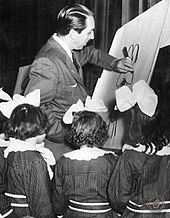

In [365]:
Image.open(BytesIO(c.content))

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [3]:
# This is the url you will scrape in this exercise
url3 ='https://en.wikipedia.org/wiki/Python' 

In [4]:
#your code
response3 = requests.get(url3)

In [5]:
response3

<Response [200]>

In [6]:
content3 = BeautifulSoup(response3.content, 'html.parser')

In [7]:
content3

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Python - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"cde0afd9-2853-494f-8efb-21aed88544f4","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Python","wgTitle":"Python","wgCurRevisionId":1048703433,"wgRevisionId":1048703433,"wgArticleId":46332325,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Disambiguation pages with short descriptions","Short description is different from Wikidata","All article disambiguation pages","All disambiguation pages","Animal common na

In [9]:
link = content3.findAll('a')

In [8]:
content3.findAll('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="extiw" href="https://en.wiktionary.org/wiki/Python" title="wiktionary:Python">Python</a>,
 <a class="extiw" href="https://en.wiktionary.org/wiki/python" title="wiktionary:python">python</a>,
 <a href="/wiki/Pythonidae" title="Pythonidae">Pythonidae</a>,
 <a href="/wiki/Python_(genus)" title="Python (genus)"><i>Python</i> (genus)</a>,
 <a href="#Computing"><span class="tocnumber">1</span> <span class="toctext">Computing</span></a>,
 <a href="#People"><span class="tocnumber">2</span> <span class="toctext">People</span></a>,
 <a href="#Roller_coasters"><span class="tocnumber">3</span> <span class="toctext">Roller coasters</span></a>,
 <a href="#Vehicles"><span class="tocnumber">4</span> <span class="toctext">Vehicles</span></a>,
 <a href="#Weaponry"><span class="tocnumber">5</span> <span class="toctext">Weaponry</span></a>,
 <a hre

In [10]:
links = []
for el in link:
    links.append(el.get('href'))

In [14]:
type(links) 

list

In [17]:
links[3]

'https://en.wiktionary.org/wiki/Python'

#### Number of Titles that have changed in the United States Code since its last release point 

In [151]:
# This is the url you will scrape in this exercise
url4 = 'http://uscode.house.gov/download/download.shtml'

In [154]:
#your code
response4 = requests.get(url4)

In [155]:
content4 = BeautifulSoup(response4.content, 'html.parser')

In [195]:
Titles = content4.findAll('div', attrs={'class','usctitle'})

In [204]:
titulos=[]
for i in range(2,len(Titles)):
    titulos.append(Titles[i].text.strip())

In [205]:
len(titulos)

52

#### A Python list with the top ten FBI's Most Wanted names 

In [206]:
# This is the url you will scrape in this exercise
url5 = 'https://www.fbi.gov/wanted/topten'

In [216]:
#your code 
request5 = requests.get(url5) 

In [217]:
content5 = BeautifulSoup(request5.content, 'html.parser')

In [218]:
wanted = content5.findAll('li', attrs={'class':'portal-type-person castle-grid-block-item'})

In [223]:
wanted[0].find('h3',attrs={'class':'title'}).find('a').text

'RAFAEL CARO-QUINTERO'

In [225]:
names=[]
for el in wanted:
    names.append(el.find('h3',attrs={'class':'title'}).find('a').text)

In [226]:
names

['RAFAEL CARO-QUINTERO',
 'YULAN ADONAY ARCHAGA CARIAS',
 'EUGENE PALMER',
 'BHADRESHKUMAR CHETANBHAI PATEL',
 'ALEJANDRO ROSALES CASTILLO',
 'ARNOLDO JIMENEZ',
 'JASON DEREK BROWN',
 'ALEXIS FLORES',
 'JOSE RODOLFO VILLARREAL-HERNANDEZ',
 'OCTAVIANO JUAREZ-CORRO']

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [18]:
# This is the url you will scrape in this exercise
url6 = 'https://www.emsc-csem.org/Earthquake/'

In [19]:
#your code
request6 = requests.get(url6)

In [20]:
content6 = BeautifulSoup(request6.content, 'html.parser')

In [21]:
earthquakes = content6.findAll('tr')

In [51]:
info_earthquakes = []
for i in range(14,64):
    s = earthquakes[i].findAll('td')[3].text.strip()
    match = re.search(r'\d{4}-\d{2}-\d{2}', s)
    date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
    m = re.search(r'\d{2}:\d{2}.\d{2}', s)
    time = datetime.datetime.strptime(m.group(), '%H:%M:%S').time()
    dicc={
        'date':str(date),
        'time':str(time),
        'latitud':earthquakes[i].findAll('td')[4].text.strip(),
        'longitud':earthquakes[i].findAll('td')[6].text.strip(),
        'region name': earthquakes[i].findAll('td')[11].text.strip(),
        }
    info_earthquakes.append(dicc)
        

In [22]:
content6.findAll('tr')[14].findAll('td')[3].text.strip()

'earthquake2021-11-24\xa0\xa0\xa018:49:14.508min ago'

In [23]:
import datetime
from datetime import date
import re
s = content6.findAll('tr')[14].findAll('td')[3].text.strip()
match = re.search(r'\d{4}-\d{2}-\d{2}', s)

In [24]:
date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
print(date)

2021-11-24


In [46]:
m = re.search(r'\d{2}:\d{2}.\d{2}', s)

In [47]:
m

<re.Match object; span=(23, 31), match='12:30:54'>

In [50]:
str(datetime.datetime.strptime(m.group(), '%H:%M:%S').time())

'12:30:54'

In [52]:
info_earthquakes

[{'date': '2021-11-24',
  'time': '18:49:14',
  'latitud': '19.17',
  'longitud': '155.48',
  'region name': 'ISLAND OF HAWAII, HAWAII'},
 {'date': '2021-11-24',
  'time': '18:38:56',
  'latitud': '37.84',
  'longitud': '32.10',
  'region name': 'CENTRAL TURKEY'},
 {'date': '2021-11-24',
  'time': '18:18:21',
  'latitud': '21.41',
  'longitud': '67.33',
  'region name': 'POTOSI, BOLIVIA'},
 {'date': '2021-11-24',
  'time': '18:05:15',
  'latitud': '21.23',
  'longitud': '68.95',
  'region name': 'TARAPACA, CHILE'},
 {'date': '2021-11-24',
  'time': '17:58:41',
  'latitud': '31.20',
  'longitud': '69.22',
  'region name': 'SAN JUAN, ARGENTINA'},
 {'date': '2021-11-24',
  'time': '17:58:33',
  'latitud': '23.70',
  'longitud': '94.10',
  'region name': 'MYANMAR'},
 {'date': '2021-11-24',
  'time': '17:49:59',
  'latitud': '46.00',
  'longitud': '15.06',
  'region name': 'SLOVENIA'},
 {'date': '2021-11-24',
  'time': '17:45:21',
  'latitud': '38.86',
  'longitud': '22.89',
  'region name'

#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
#your code

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
#your code

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [82]:
# This is the url you will scrape in this exercise
url7 = 'https://www.wikipedia.org/'

In [83]:
#your code
request7 = requests.get(url7)

In [84]:
response7 = BeautifulSoup(request7.content, 'html.parser')

In [93]:
lang = response7.findAll('li')

In [94]:
response7.findAll('li')

[<li><a href="//pl.wikipedia.org/" lang="pl">Polski</a></li>,
 <li><a href="//ar.wikipedia.org/" lang="ar" title="Al-ʿArabīyah"><bdi dir="rtl">العربية</bdi></a></li>,
 <li><a href="//de.wikipedia.org/" lang="de">Deutsch</a></li>,
 <li><a href="//en.wikipedia.org/" lang="en" title="English">English</a></li>,
 <li><a href="//es.wikipedia.org/" lang="es">Español</a></li>,
 <li><a href="//fr.wikipedia.org/" lang="fr">Français</a></li>,
 <li><a href="//it.wikipedia.org/" lang="it">Italiano</a></li>,
 <li><a href="//arz.wikipedia.org/" lang="arz" title="Maṣrī"><bdi dir="rtl">مصرى</bdi></a></li>,
 <li><a href="//nl.wikipedia.org/" lang="nl">Nederlands</a></li>,
 <li><a href="//ja.wikipedia.org/" lang="ja" title="Nihongo">日本語</a></li>,
 <li><a href="//pt.wikipedia.org/" lang="pt">Português</a></li>,
 <li><a href="//ru.wikipedia.org/" lang="ru" title="Russkiy">Русский</a></li>,
 <li><a href="//ceb.wikipedia.org/" lang="ceb">Sinugboanong Binisaya</a></li>,
 <li><a href="//sv.wikipedia.org/" lang

In [98]:
response7.findAll('li')[0].find('a').get('href')

'//pl.wikipedia.org/'

In [99]:
languages = []
for el in lang:
    d = {
        'language':el.text,
        'articles':el.find('a').get('href')
        }
    languages.append(d)

In [101]:
languages

[{'language': 'Polski', 'articles': '//pl.wikipedia.org/'},
 {'language': 'العربية', 'articles': '//ar.wikipedia.org/'},
 {'language': 'Deutsch', 'articles': '//de.wikipedia.org/'},
 {'language': 'English', 'articles': '//en.wikipedia.org/'},
 {'language': 'Español', 'articles': '//es.wikipedia.org/'},
 {'language': 'Français', 'articles': '//fr.wikipedia.org/'},
 {'language': 'Italiano', 'articles': '//it.wikipedia.org/'},
 {'language': 'مصرى', 'articles': '//arz.wikipedia.org/'},
 {'language': 'Nederlands', 'articles': '//nl.wikipedia.org/'},
 {'language': '日本語', 'articles': '//ja.wikipedia.org/'},
 {'language': 'Português', 'articles': '//pt.wikipedia.org/'},
 {'language': 'Русский', 'articles': '//ru.wikipedia.org/'},
 {'language': 'Sinugboanong Binisaya', 'articles': '//ceb.wikipedia.org/'},
 {'language': 'Svenska', 'articles': '//sv.wikipedia.org/'},
 {'language': 'Українська', 'articles': '//uk.wikipedia.org/'},
 {'language': 'Tiếng Việt', 'articles': '//vi.wikipedia.org/'},
 {'

#### A list with the different kind of datasets available in data.gov.uk 

In [102]:
# This is the url you will scrape in this exercise
url8 = 'https://data.gov.uk/'

In [105]:
#your code 
req = requests.get(url8)

In [107]:
content8 = BeautifulSoup(req.content, 'html.parser')

In [121]:
dat = content8.findAll('li')

In [131]:
data = []
for i in range(3,17):
    data.append(dat[i].find('a').text)

In [132]:
data

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [133]:
# This is the url you will scrape in this exercise
url9 = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [136]:
#your code
requ = requests.get(url9)

In [138]:
content9 = BeautifulSoup(requ.content,'html.parser')

In [259]:
content9.find('div', attrs={'class':'mw-parser-output'}).findAll('table')[3].findAll('tr')

[<tr>
 <th>Rank
 </th>
 <th>Language
 </th>
 <th data-sort-type="number">Native<br/>speakers<br/>in millions<br/>2007 (2010)
 </th>
 <th>Percentage<br/>of world<br/>population<br/>(2007)
 </th></tr>,
 <tr>
 <td>1</td>
 <td><a href="/wiki/Mandarin_Chinese" title="Mandarin Chinese">Mandarin</a> (entire branch)</td>
 <td>935 (955)</td>
 <td>14.1%
 </td></tr>,
 <tr>
 <td>2</td>
 <td><a href="/wiki/Spanish_language" title="Spanish language">Spanish</a></td>
 <td>390 (405)</td>
 <td>5.85%
 </td></tr>,
 <tr>
 <td>3</td>
 <td><a href="/wiki/English_language" title="English language">English</a></td>
 <td>365 (360)</td>
 <td>5.52%
 </td></tr>,
 <tr>
 <td>4</td>
 <td><a class="mw-redirect" href="/wiki/Hindi_language" title="Hindi language">Hindi</a><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[a]</a></sup></td>
 <td>295 (310)</td>
 <td>4.46%
 </td></tr>,
 <tr>
 <td>5</td>
 <td><a class="mw-redirect" href="/wiki/Arabic_language" title="Arabic language">Arabic</a></td>
 <td>280 

In [260]:
lan = content9.find('div', attrs={'class':'mw-parser-output'}).findAll('table')[3].findAll('tr')

In [261]:
lang = []
for i in range(2,93):
    dcc = {
        'language':lan[i].findAll('td')[1].text.strip(),
        'speakers':lan[i].findAll('td')[2].text.strip()
        }
    lang.append(dcc)

In [262]:
lang

[{'language': 'Spanish', 'speakers': '390 (405)'},
 {'language': 'English', 'speakers': '365 (360)'},
 {'language': 'Hindi[a]', 'speakers': '295 (310)'},
 {'language': 'Arabic', 'speakers': '280 (295)'},
 {'language': 'Portuguese', 'speakers': '205 (215)'},
 {'language': 'Bengali', 'speakers': '200 (205)'},
 {'language': 'Russian', 'speakers': '160 (155)'},
 {'language': 'Japanese', 'speakers': '125 (125)'},
 {'language': 'Punjabi', 'speakers': '95 (100)'},
 {'language': 'German', 'speakers': '92 (95)'},
 {'language': 'Javanese', 'speakers': '82'},
 {'language': 'Wu (inc. Shanghainese)', 'speakers': '80'},
 {'language': 'Malay (inc. Indonesian and Malaysian)', 'speakers': '77'},
 {'language': 'Telugu', 'speakers': '76'},
 {'language': 'Vietnamese', 'speakers': '76'},
 {'language': 'Korean', 'speakers': '76'},
 {'language': 'French', 'speakers': '75'},
 {'language': 'Marathi', 'speakers': '73'},
 {'language': 'Tamil', 'speakers': '70'},
 {'language': 'Urdu', 'speakers': '66'},
 {'langua

In [263]:
top =pd.DataFrame(lang)

In [264]:
top10=top.head(10)

In [265]:
top10

,language,speakers
0,Spanish,390 (405)
1,English,365 (360)
2,Hindi[a],295 (310)
3,Arabic,280 (295)
4,Portuguese,205 (215)
5,Bengali,200 (205)
6,Russian,160 (155)
7,Japanese,125 (125)
8,Punjabi,95 (100)
9,German,92 (95)


### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [69]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url11 = 'http://books.toscrape.com/'

In [94]:
#your code
response11 = requests.get(url11)
content11 = BeautifulSoup(response11.content, 'html.parser')

In [136]:
for elem in content11.findAll('div'):
    elem = elem.find('a')
    for el in elem:
        el.find('href', )

TypeError: 'NoneType' object is not iterable

In [175]:
content11.findAll('div').find('li', atts={'class':'col-xs-6 col-sm-4 col-md-3 col-lg-3'}).contents

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [177]:
try:
    for ele in content11.findAll('div'):
        print(dir(ele.find('li', atts={'class':'col-xs-6 col-sm-4 col-md-3 col-lg-3'}))
except:
    pass

SyntaxError: invalid syntax (<ipython-input-177-b1d8db030627>, line 4)

In [160]:
len(content11.findAll('div'))

56

In [184]:
ele.find('ol', atts={'class':'row'}).contents

AttributeError: 'NoneType' object has no attribute 'contents'